In [1]:
print('Ritu')

Ritu


In [17]:
import numpy as np
import pandas as pd
import re
import gensim
import os
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from gensim.models import KeyedVectors

In [3]:
msg = pd.read_csv(r'E:\kaushal\data science\nlp\code\kirsh\train\smsspamcollection\SMSSpamCollection',sep = '\t',names = ['label','message'])
msg

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
msg.message[451]

'hanks lotsly!'

In [5]:
ps = PorterStemmer()
corpus = [] 
for i in msg['message']:
    review = re.sub('[^a-zA-z]',' ',i)
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    corpus.append(' '.join(review))
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [6]:
# beg of words
cv = CountVectorizer(max_features = 2500)
Xcv = cv.fit_transform(corpus).toarray()

In [7]:
le = LabelEncoder()
y = le.fit_transform(msg.label)
y

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(Xcv,y,test_size = 0.23,random_state =32001 )

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4290, 2500)
(1282, 2500)
(4290,)
(1282,)


In [10]:
model = MultinomialNB().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9812792511700468
0.9812792511700468
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1091
           1       0.92      0.96      0.94       191

    accuracy                           0.98      1282
   macro avg       0.96      0.97      0.96      1282
weighted avg       0.98      0.98      0.98      1282



<Axes: >

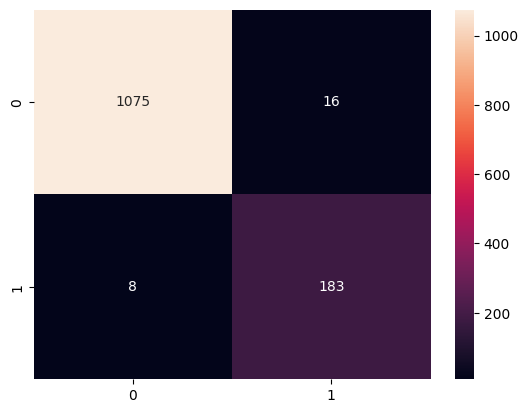

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [12]:
# Tf-Idf

tv = TfidfVectorizer(max_features = 2500)
Xtv = tv.fit_transform(corpus).toarray()

0.9750390015600624
0.9750390015600624
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1091
           1       0.98      0.85      0.91       191

    accuracy                           0.98      1282
   macro avg       0.98      0.92      0.95      1282
weighted avg       0.98      0.98      0.97      1282



<Axes: >

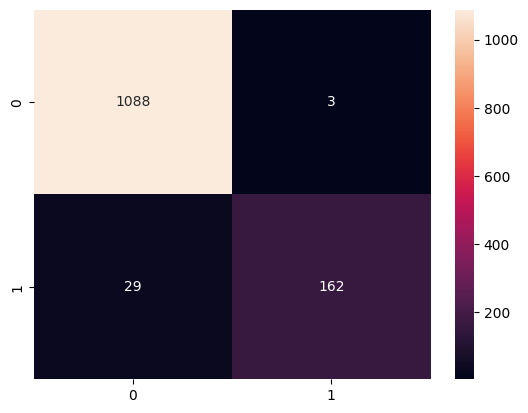

In [13]:
X_train,X_test,y_train,y_test = train_test_split(Xtv,y,test_size = 0.23,random_state =32001 )
model = MultinomialNB().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

# Word2vec Implementation

In [14]:
wv = KeyedVectors.load('word2vec-google-news-300.kv')

In [18]:
king = wv['king']
king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [19]:
lemmatizer = WordNetLemmatizer()

In [27]:
corpus = []
for i in msg.message:
    corpus.append([lemmatizer.lemmatize(word) for word in re.sub('[^a-zA-Z0-9]', ' ',i).lower().split() if word not in stopwords.words('english')])
corpus

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'apply',
  '08452810075over18'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  '3',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  '1',
  '50',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  '

In [29]:
wvm = gensim.models.Word2Vec(corpus,window = 5,min_count = 2)
wvm.wv.index_to_key

['u',
 'call',
 '2',
 'get',
 'ur',
 '4',
 'gt',
 'lt',
 'go',
 'ok',
 'free',
 'day',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'love',
 'text',
 'want',
 'send',
 'need',
 'one',
 'today',
 'r',
 'txt',
 '1',
 'going',
 'home',
 'c',
 'stop',
 'lor',
 'sorry',
 'see',
 'still',
 'n',
 'take',
 'mobile',
 'back',
 'da',
 'reply',
 'dont',
 'k',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'new',
 'later',
 'please',
 'pls',
 'co',
 'msg',
 'make',
 'night',
 'dear',
 'message',
 'well',
 'say',
 'much',
 'thing',
 'great',
 'min',
 'oh',
 'claim',
 'hope',
 'hey',
 'number',
 'give',
 'happy',
 'friend',
 'wat',
 'work',
 '3',
 'yes',
 'way',
 'www',
 'let',
 'e',
 'prize',
 'right',
 'tomorrow',
 'already',
 'ask',
 'said',
 'amp',
 'cash',
 'b',
 'life',
 'yeah',
 'tone',
 'really',
 'im',
 'babe',
 'meet',
 'find',
 'miss',
 'win',
 'morning',
 'uk',
 'last',
 'service',
 'thanks',
 'care',
 'anything',
 'would',
 'year',
 'lol',
 'also',
 'feel',
 'every',
 'keep',
 '

In [31]:
wvm.corpus_count

5572

In [32]:
wvm.wv.similar_by_word('kid')

[('car', 0.9967398047447205),
 ('person', 0.9967124462127686),
 ('quite', 0.9966815710067749),
 ('even', 0.9966792464256287),
 ('day', 0.9966183304786682),
 ('5', 0.9965730905532837),
 ('pic', 0.9965519905090332),
 ('well', 0.9965457916259766),
 ('e', 0.9965116381645203),
 ('actually', 0.9965087175369263)]

In [33]:
wvm.wv.most_similar('kid')


[('car', 0.9967398047447205),
 ('person', 0.9967124462127686),
 ('quite', 0.9966815710067749),
 ('even', 0.9966792464256287),
 ('day', 0.9966183304786682),
 ('5', 0.9965730905532837),
 ('pic', 0.9965519905090332),
 ('well', 0.9965457916259766),
 ('e', 0.9965116381645203),
 ('actually', 0.9965087175369263)]

In [34]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)
        
    
    